In [67]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from pylab import *
from rdkit.Chem import Descriptors as CDesc
from rdkit.ML.Descriptors import MoleculeDescriptors

In [36]:
dataset = PandasTools.LoadSDF('../data/ADME/solubility.sdf')

,Solubility,ID,ROMol
0,11.745233,Row1,
1,12.822922,Row2,
2,10.337935,Row4,
3,11.87685,Row5,
4,11.713884,Row6,

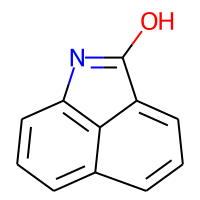
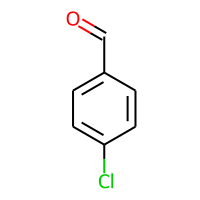
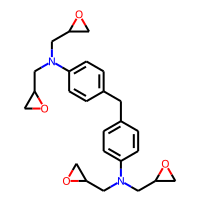
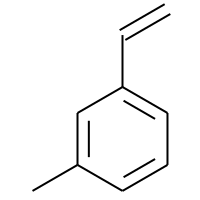
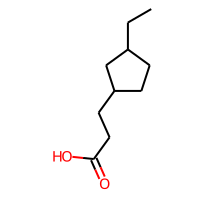

In [37]:
dataset.head()

In [104]:
dataset.shape, dataset.Solubility.dtype

((8881, 3), dtype('float64'))

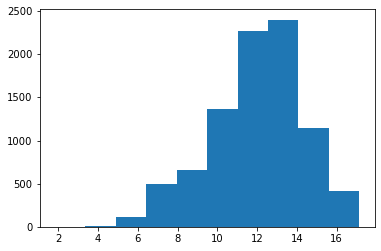

In [105]:
hist(dataset.Solubility);

In [42]:
mols = dataset.ROMol.values

In [43]:
desc_list = list(map( lambda a: a[0], CDesc.descList))
desc_list.remove('Ipc') # gives inf sometimes
desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator( desc_list )


In [44]:
lst = list(map( lambda a: desc_calc.CalcDescriptors(a), mols))

In [45]:
X = np.array(lst)
y = dataset.Solubility.values

In [72]:
import pandas as pd
df = pd.DataFrame(columns = desc_list, data = X)
df['Solubility'] = y

In [76]:
df_clean = df.dropna()

In [77]:
X = df_clean[desc_list].values
y = df_clean['Solubility'].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gb = GradientBoostingRegressor()

In [82]:
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [83]:
y_pred = gb.predict(X_test)

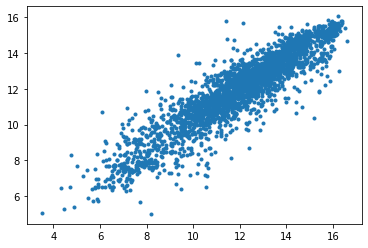

In [86]:
plot(y_test, y_pred,'.')

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_test, y_pred)

0.8363565485596025

In [99]:
ft = pd.DataFrame(data = {'Name':desc_list, 'Importance':gb.feature_importances_})

In [103]:
ft.sort_values('Importance', ascending = False)

,Name,Importance
120,MolLogP,0.754362
26,BertzCT,0.071498
121,MolMR,0.014904
39,HallKierAlpha,0.014238
11,MinPartialCharge,0.010274
...,...,...
142,fr_Ndealkylation2,0.000000
141,fr_Ndealkylation1,0.000000
140,fr_N_O,0.000000
137,fr_NH0,0.000000
